<a href="https://colab.research.google.com/github/spasatel13/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/DS21_W1_D3_Solutions_Join_%26_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Join & Reshape Data

## Objectives

- Concatenate data using the pandas concat method
- Merge data using pandas merge
- Define the concept of tidy data and describe the format
- Transition between tidy and wide data formats with the `melt` and `pivot` methods

![The Anatomy of a DataFrame and a Series](https://miro.medium.com/max/700/1*ZSehcrMtBWN7_qCWq_HiSg.png)

## Concatenating Dataframes with Pandas

"Concatenate" is a fancy word for joining two things together. For example, we can concatenate two strings together using the `+` operator.

In [2]:
'We can join/concatenate two strings together ' + 'using the "+" operator.'

'We can join/concatenate two strings together using the "+" operator.'

In [3]:
%ls -l

total 200808
drwxr-xr-x 3 root root      4096 Oct  5 17:05 instacart-market-basket-analysis/
-rw-r--r-- 1 root root 205616541 Oct  5 17:05 instacart-market-basket-analysis.zip
drwxr-xr-x 3 root root      4096 Oct  5 17:05 __MACOSX/


In [4]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.DataFrame({'a': [1,2,3,4], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df2 = pd.DataFrame({'a': [6,4,8,7], 'b': [9,4,3,2], 'c': [1,6,2,9]})

In [6]:
df1.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [7]:
df2.head()

,a,b,c
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


### Concatenate by Rows 

concatenating by rows is the default behavior of `pd.concat()` This is often the most common form of concatenation. 

In [8]:
by_rows = pd.concat([df1, df2])
by_rows = pd.concat([df1,df2])

by_rows

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [9]:
by_rows.reset_index()
by_rows.reset_index()

,index,a,b,c
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9
3,3,4,7,10
4,0,6,9,1
5,1,4,4,6
6,2,8,3,2
7,3,7,2,9


### Concatenate by Columns

In [10]:
by_cols = pd.concat([df1, df2], axis=1)
by_cols=pd.concat([df1,df2], axis=1)

by_cols

,a,b,c,a,b,c
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


In [11]:
by_cols['a']

,a,a
0,1,6
1,2,4
2,3,8
3,4,7


In [12]:
# rename columns

by_cols.columns = ['a1', 'b1', 'c1', 'a2', 'b2', 'c2']

by_cols

,a1,b1,c1,a2,b2,c2
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


In [13]:
by_cols['a1']

0    1
1    2
2    3
3    4
Name: a1, dtype: int64

When concatenating dataframes, it is done using the column headers and row index values to match rows up. If these don't match up, then `NaN` values will be added where matches can't be found. 

In [14]:
df3 = pd.DataFrame({'a': [4,3,2,1], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df4 = pd.DataFrame({'a': [6,4,8,7,8], 'b': [9,4,3,2,1], 'd': [1,6,2,9,5]})

In [15]:
df3.head()

,a,b,c
0,4,4,7
1,3,5,8
2,2,6,9
3,1,7,10


In [16]:
df4.head()

,a,b,d
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9
4,8,1,5


### Concatenate by rows when not all column headers match

In [17]:
by_rows = pd.concat([df3, df4])

by_rows

,a,b,c,d
0,4,4,7.0,NaN
1,3,5,8.0,NaN
2,2,6,9.0,NaN
3,1,7,10.0,NaN
0,6,9,NaN,1.0
1,4,4,NaN,6.0
2,8,3,NaN,2.0
3,7,2,NaN,9.0
4,8,1,NaN,5.0


In [18]:
by_rows.reset_index()

,index,a,b,c,d
0,0,4,4,7.0,NaN
1,1,3,5,8.0,NaN
2,2,2,6,9.0,NaN
3,3,1,7,10.0,NaN
4,0,6,9,NaN,1.0
5,1,4,4,NaN,6.0
6,2,8,3,NaN,2.0
7,3,7,2,NaN,9.0
8,4,8,1,NaN,5.0


### Concatenate by columns when not all row indexes match

In [19]:
by_cols = pd.concat([df3, df4], axis=1)

by_cols

,a,b,c,a,b,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


Whenever we are combining dataframes, if appropriate values cannot be found based on the rules of the method we are using, then missing values will be filled with `NaNs`.

### Let's Try It Out

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

The files that we will be working with are in a folder of CSVs, we need to load that folder of CSVs, explore the CSVs to make sure that we understand what we're working with, and where the important data lies, and then work to combine the dataframes together as necessary. 



Our goal is to reproduce this table which holds the first two orders for user id 1.


In [20]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [21]:
!wget https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip

--2020-10-05 22:01:23--  https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip [following]
--2020-10-05 22:01:24--  https://www.dropbox.com/s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc558800c171345157425b3ae6e3.dl.dropboxusercontent.com/cd/0/inline/BAtV3_g3mDpTYZ0PbxUjBWlU4xrzXvewwnwmam_pFmbYLV7h1Bn4ull9RuT85aFu0PKXDwR1S8kIemxNic_PbCi_DmE4zrGuL31CuExwsIqDuxRaZDhxcaTeZt4I-JoBPBE/file# [following]
--2020-10-05 22:01:24--  https://uc558800c171345157425b3ae6e3.dl.dropboxusercontent.com/cd/0/inline/BAtV3_g3mDpTYZ0PbxUjBWlU4xrzXvewwnwmam_pFm

In [22]:
!unzip instacart-market-basket-analysis.zip

Archive:  instacart-market-basket-analysis.zip
replace __MACOSX/._instacart-market-basket-analysis? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [23]:
%cd instacart-market-basket-analysis
!ls -all

/content/instacart-market-basket-analysis
total 897436
drwxr-xr-x 3 root root      4096 Oct  5 17:05 .
drwxr-xr-x 1 root root      4096 Oct  5 22:01 ..
-rw-r--r-- 1 root root      2603 May  2  2017 aisles.csv
-rw-rw-r-- 1 root root      1911 Dec 11  2019 aisles.csv.zip
-rw-r--r-- 1 root root       270 May  2  2017 departments.csv
-rw-rw-r-- 1 root root       804 Dec 11  2019 departments.csv.zip
-rw-r--r-- 1 root root      6148 Sep 20 18:38 .DS_Store
drwxrwxr-x 2 root root      4096 Oct  5 17:05 __MACOSX
-rw-r--r-- 1 root root 577550706 May  2  2017 order_products__prior.csv
-rw-rw-r-- 1 root root 164687340 Dec 11  2019 order_products__prior.csv.zip
-rw-r--r-- 1 root root  24680147 May  2  2017 order_products__train.csv
-rw-rw-r-- 1 root root   7238754 Dec 11  2019 order_products__train.csv.zip
-rw-r--r-- 1 root root 108968645 May  2  2017 orders.csv
-rw-rw-r-- 1 root root  32807090 Dec 11  2019 orders.csv.zip
-rw-r--r-- 1 root root   2166953 May  2  2017 products.csv
-rw-rw-r-- 1 root 

In [24]:
%ls -all

total 897436
drwxr-xr-x 3 root root      4096 Oct  5 17:05 ./
drwxr-xr-x 1 root root      4096 Oct  5 22:01 ../
-rw-r--r-- 1 root root      2603 May  2  2017 aisles.csv
-rw-rw-r-- 1 root root      1911 Dec 11  2019 aisles.csv.zip
-rw-r--r-- 1 root root       270 May  2  2017 departments.csv
-rw-rw-r-- 1 root root       804 Dec 11  2019 departments.csv.zip
-rw-r--r-- 1 root root      6148 Sep 20 18:38 .DS_Store
drwxrwxr-x 2 root root      4096 Oct  5 17:05 __MACOSX/
-rw-r--r-- 1 root root 577550706 May  2  2017 order_products__prior.csv
-rw-rw-r-- 1 root root 164687340 Dec 11  2019 order_products__prior.csv.zip
-rw-r--r-- 1 root root  24680147 May  2  2017 order_products__train.csv
-rw-rw-r-- 1 root root   7238754 Dec 11  2019 order_products__train.csv.zip
-rw-r--r-- 1 root root 108968645 May  2  2017 orders.csv
-rw-rw-r-- 1 root root  32807090 Dec 11  2019 orders.csv.zip
-rw-r--r-- 1 root root   2166953 May  2  2017 products.csv
-rw-rw-r-- 1 root root    813666 Dec 11  2019 products.cs

In [25]:
# Unzip all .csv.zip files in the directory
!unzip "*.zip"

Archive:  orders.csv.zip
replace orders.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [26]:
# List all csv files in the current directory
# -l specifies the "long" listing format, which includes additional info on each file
# -h specifies "human readable" file size units
!ls -l -h *.csv

-rw-r--r-- 1 root root 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 root root  270 May  2  2017 departments.csv
-rw-r--r-- 1 root root 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 root root  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 root root 104M May  2  2017 orders.csv
-rw-r--r-- 1 root root 2.1M May  2  2017 products.csv


In [27]:
display(example)

#### aisles

We don't need anything from aisles.csv

In [28]:
aisles = pd.read_csv('aisles.csv')

print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


#### departments

We don't need anything from departments.csv

In [29]:
departments = pd.read_csv('departments.csv')

print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


#### order_products__prior

We need:
- order id
- product id
- add to cart order

Everything except for 'reordered'

In [30]:
order_products__prior = pd.read_csv('order_products__prior.csv')

print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


#### order_products__train

We need:
- order id
- proudct id
- add to cart order

Everything except for 'reordered'

Do you see anything similar between order_products__train and order_products__prior?



In [31]:
order_products__train = pd.read_csv('order_products__train.csv')

print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


#### orders

We need:
- order id
- user id
- order number
- order dow
- order hour of day

In [32]:
orders = pd.read_csv('orders.csv')

print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [33]:
orders.sort_values('order_id')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


#### products

We need:
- product id
- product name

In [34]:
products = pd.read_csv('products.csv')

print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


#### Concatenate order_products__prior and order_products__train

In [35]:
order_products = pd.concat([order_products__prior, order_products__train])

order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [36]:
print(order_products__prior.shape)
print(order_products__train.shape)
print(order_products__prior.shape[0]+order_products__train.shape[0])

(32434489, 4)
(1384617, 4)
33819106


In [37]:
print(order_products.shape)

(33819106, 4)


### Key Point(s)

Concatenating dataframes means to stick two dataframes together either by rows or by columns. The default behavior of `pd.concat()` is to take the rows of one dataframe and add them to the rows of another dataframe. If we pass the argument `axis=1` then we will be adding the columns of one dataframe to the columns of another dataframe.

Concatenating dataframes is most useful when the columns are the same between two dataframes or when we have matching row indices between two dataframes. 

Be ready to use this method to combine dataframes together during your assignment.

## Merging Dataframes with Pandas

In [38]:
display(example)

Before we can continue we need to understand where the data in the above table is coming from and what why specific pieces of data are held in the specific dataframes.

Each of these CSVs has a specific unit of observation (row). The columns that we see included in each CSV were selected purposefully. For example, everything each row of the `orders` dataframe is a specific and unique order -telling us who made the order, and when they made it. Every row in the `products` dataframe tells us about a specific and unique product that the store offers. And everything in the `order_products` dataframe tells us about how products are associated with specific orders -including when the product was added to the shopping cart. 

### The Orders Dataframe

Holds information about specific orders, things like who placed the order, what 

- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

### The Products Dataframe

Holds information about individual products.

- product_id
- product_name

### The Order_Products Dataframe

Tells us how products are associated with specific orders since an order is a group of products.

- order_id
- product_id
- add_to_cart_order

As we look at the table that we're trying to recreate, we notice that we're not looking at specific orders or products, but at a specific **USER**. We're looking at the first two orders for a specific user and the products associated with those orders, so we'll need to combine dataframes to get all of this data together into a single table.

**The key to combining all of this information is that we need values that exist in both datasets that we can use to match up rows and combine dataframes.**

### Let's Try It Out
We have two dataframes, so we're going to need to merge our data twice. As we approach merging datasets together we will take the following approach.

1) Identify which two dataframes we would like to combine.

2) Find columns that are common between both dataframes that we can use to match up information.

3) Slim down both of our dataframes so that they contain only the relevant data before we merge.

4) Merge the dataframes.

In [39]:
merge_one = pd.merge(order_products, orders, how='inner', on='order_id')

merge_one.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [40]:
all_info = pd.merge(merge_one, products, how='inner', on='product_id')

all_info.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16


#### ^^^^^ DON'T DO THIS!

I just merged absolutely everything



In [41]:
## all_info2 = pd.merge(merge_one, )

#### First Merge

1) Combine `orders` and `order_products`

2) We will use the `order_id` column to match information between the two datasets

3) Lets slim down our dataframes to only the information that we need. We do this because the merge process is complex. Why would we merge millions of rows together if we know that we're only going to need 11 rows when we're done

What specific conditions could we use to slim down the `orders` dataframe?

`user_id == 1` and `order_id <=2`

or

`order_id == 2539329` and `order_id == 2398795`

In [42]:
# An example of dataframe filtering

# Create a condition
condition = orders['order_id'] <=5

# Pass that condition into the square brackets 
# that we use to access portions of a dataframe
# only the rows where that condition evaluates to *TRUE*
# will be retained in the dataframe

# Look at the subsetted dataframe
orders[condition]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [43]:
display(example)

In [44]:
# We don't necessarily have to save our condition to the variable "condition"
# we can pass the condition into the square bracket directly
# I just wanted to be clear what was happening inside of the square brackets

orders[(orders['order_id'] <=5)]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [45]:
#orders[0:10,0:5]

In [46]:
orders['user_id'] == 1

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [47]:
orders['order_number'] <= 2

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: order_number, Length: 3421083, dtype: bool

In [48]:
# Filter based on user_id and order_number
# AND condition version 
# I need to use the "bitwise" and operator: &

condition = (orders['user_id'] == 1) & (orders['order_number'] <= 5)

orders_subset = orders[condition]

orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Remember there are multiple ways that we could have filtered this dataframe. We also could have done it by specific `order_id`s


In [49]:
# use the bitwise "or" operator: |

condition = (orders['order_id'] == 2539329) | (orders['order_id'] == 2398795)

orders_subset = orders[condition]

orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


Now we'll filter down the order_products dataframe

What conditions could we use for subsetting that table?

We can use order_id again.

In [50]:
condition = (order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)

order_products_subset = order_products[condition]

order_products_subset

,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0


4) Now we're ready to merge these two tables together.

In [51]:
orders_and_products = pd.merge(orders_subset, order_products_subset, on='order_id')

orders_and_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [52]:
display(example)

In [53]:
# Remove columns that we don't need

uneeded_cols = ['eval_set', 'days_since_prior_order', 'add_to_cart_order', 'reordered']

orders_and_products.drop(uneeded_cols, inplace=True, axis=1)

orders_and_products

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id
0,2539329,1,1,2,8,196
1,2539329,1,1,2,8,14084
2,2539329,1,1,2,8,12427
3,2539329,1,1,2,8,26088
4,2539329,1,1,2,8,26405
5,2398795,1,2,3,7,196
6,2398795,1,2,3,7,10258
7,2398795,1,2,3,7,12427
8,2398795,1,2,3,7,13176
9,2398795,1,2,3,7,26088


Okay, we're looking pretty good, we're missing one more column `product_name` so we're going to need to merge one more time

1) merge `orders_and_products` with `products`

2) Use `product_id` as our identifier in both tables

3) We need to slim down the `products` dataframe

In [54]:
condition = products['product_id'].isin(orders_and_products['product_id'])

products_subset = products[condition]

products_subset

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [55]:
final = pd.merge(products_subset, orders_and_products, on='product_id')

final

,product_id,product_name,aisle_id,department_id,order_id,user_id,order_number,order_dow,order_hour_of_day
0,196,Soda,77,7,2539329,1,1,2,8
1,196,Soda,77,7,2398795,1,2,3,7
2,10258,Pistachios,117,19,2398795,1,2,3,7
3,12427,Original Beef Jerky,23,19,2539329,1,1,2,8
4,12427,Original Beef Jerky,23,19,2398795,1,2,3,7
5,13032,Cinnamon Toast Crunch,121,14,2398795,1,2,3,7
6,13176,Bag of Organic Bananas,24,4,2398795,1,2,3,7
7,14084,Organic Unsweetened Vanilla Almond Milk,91,16,2539329,1,1,2,8
8,26088,Aged White Cheddar Popcorn,23,19,2539329,1,1,2,8
9,26088,Aged White Cheddar Popcorn,23,19,2398795,1,2,3,7


In [56]:
final = final.drop(['aisle_id', 'department_id'], axis=1)

final

,product_id,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day
0,196,Soda,2539329,1,1,2,8
1,196,Soda,2398795,1,2,3,7
2,10258,Pistachios,2398795,1,2,3,7
3,12427,Original Beef Jerky,2539329,1,1,2,8
4,12427,Original Beef Jerky,2398795,1,2,3,7
5,13032,Cinnamon Toast Crunch,2398795,1,2,3,7
6,13176,Bag of Organic Bananas,2398795,1,2,3,7
7,14084,Organic Unsweetened Vanilla Almond Milk,2539329,1,1,2,8
8,26088,Aged White Cheddar Popcorn,2539329,1,1,2,8
9,26088,Aged White Cheddar Popcorn,2398795,1,2,3,7


In [57]:
display(example)

#### Some nitpicky cleanup:

In [58]:
# sort rows
final = final.sort_values(by=['order_id'])

final

,product_id,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day
1,196,Soda,2398795,1,2,3,7
2,10258,Pistachios,2398795,1,2,3,7
4,12427,Original Beef Jerky,2398795,1,2,3,7
5,13032,Cinnamon Toast Crunch,2398795,1,2,3,7
6,13176,Bag of Organic Bananas,2398795,1,2,3,7
9,26088,Aged White Cheddar Popcorn,2398795,1,2,3,7
0,196,Soda,2539329,1,1,2,8
3,12427,Original Beef Jerky,2539329,1,1,2,8
7,14084,Organic Unsweetened Vanilla Almond Milk,2539329,1,1,2,8
8,26088,Aged White Cheddar Popcorn,2539329,1,1,2,8


In [59]:
# reorder columns
final = final[['user_id', 'order_id', 'order_number','order_dow', 'order_hour_of_day', 'product_id', 'product_name']]

final

,user_id,order_id,order_number,order_dow,order_hour_of_day,product_id,product_name
1,1,2398795,2,3,7,196,Soda
2,1,2398795,2,3,7,10258,Pistachios
4,1,2398795,2,3,7,12427,Original Beef Jerky
5,1,2398795,2,3,7,13032,Cinnamon Toast Crunch
6,1,2398795,2,3,7,13176,Bag of Organic Bananas
9,1,2398795,2,3,7,26088,Aged White Cheddar Popcorn
0,1,2539329,1,2,8,196,Soda
3,1,2539329,1,2,8,12427,Original Beef Jerky
7,1,2539329,1,2,8,14084,Organic Unsweetened Vanilla Almond Milk
8,1,2539329,1,2,8,26088,Aged White Cheddar Popcorn


In [60]:
# remove underscores from column headers

final.columns = [column.replace('_', ' ') for column in final]

final

,user id,order id,order number,order dow,order hour of day,product id,product name
1,1,2398795,2,3,7,196,Soda
2,1,2398795,2,3,7,10258,Pistachios
4,1,2398795,2,3,7,12427,Original Beef Jerky
5,1,2398795,2,3,7,13032,Cinnamon Toast Crunch
6,1,2398795,2,3,7,13176,Bag of Organic Bananas
9,1,2398795,2,3,7,26088,Aged White Cheddar Popcorn
0,1,2539329,1,2,8,196,Soda
3,1,2539329,1,2,8,12427,Original Beef Jerky
7,1,2539329,1,2,8,14084,Organic Unsweetened Vanilla Almond Milk
8,1,2539329,1,2,8,26088,Aged White Cheddar Popcorn


In [61]:
display(example)

In [62]:
df=final.copy()
df

,user id,order id,order number,order dow,order hour of day,product id,product name
1,1,2398795,2,3,7,196,Soda
2,1,2398795,2,3,7,10258,Pistachios
4,1,2398795,2,3,7,12427,Original Beef Jerky
5,1,2398795,2,3,7,13032,Cinnamon Toast Crunch
6,1,2398795,2,3,7,13176,Bag of Organic Bananas
9,1,2398795,2,3,7,26088,Aged White Cheddar Popcorn
0,1,2539329,1,2,8,196,Soda
3,1,2539329,1,2,8,12427,Original Beef Jerky
7,1,2539329,1,2,8,14084,Organic Unsweetened Vanilla Almond Milk
8,1,2539329,1,2,8,26088,Aged White Cheddar Popcorn


### Challenge

Review this Chis Albon documentation about [concatenating dataframes by row and by column](https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/) and then be ready to master this function and practice using different `how` parameters on your assignment.

## Tidy Data Format

### What is the Tidy Data Format?

In 2014, Hadley Wickham published an awesome paper named Tidy Data, that describes the process of tidying a dataset in R.

#### Conditions of Tidy Data

1. Each variable must have its own column.
2. Each observation must have its own row.

![Tidy Data Diagrams](https://miro.medium.com/max/700/1*7jjzhy4KknPz9hJVnC_w7w.png)

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

### Wide Data vs Long Data

- Long data = Separates the unit of analysis (country-year) into two separate variables.

![Long Data](https://tk-assets.lambdaschool.com/59e0b466-1a11-4561-b4e5-2ccbe800941b_long-data.png)

- Wide data = Combines one of the keys (year) with the value variable (avgtemp).
![Wide Data](https://tk-assets.lambdaschool.com/a168bf92-0696-494e-8366-ca18e7fb6742_wide-data.png)


#### The Case For Long Data
- More variables (columns) with wide data = **harder to summarise at a glance**
-  Structuring data as key-value pairs — as is done in long-form datasets — facilitates **conceptual clarity**. For example, in `country_long` above, it is clear that the unit of analysis is country-year — or, put differently, that the variables `country` and `year` jointly constitute the key in the dataset.
- Long-form datasets are often required for **advanced statistical analysis** and graphing. Furthermore, many graphing packages, rely on your data being in long form.


#### Wide Data
- Wide data format may be required for plotting (e.g. box plots)

### Why reshape data?

- Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

### Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [64]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [65]:
# When we swap rows and columns we call that "transposing"
table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

### Let's Try It Out

#### Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [66]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [67]:
# Take the row index, and add it as a new column
table1 = table1.reset_index()

table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [68]:
# What is the unique identifier for each row
# Where is the data that I want to be in my single "tidy" column
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [69]:
# rename columns
tidy1 = tidy.rename(columns={ 'index': 'name', 'variable': 'trt', 'value': 'result'})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [70]:
tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


#### Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [71]:
# index: unique identifier
# columns: What do you want to differentiate the columns in wide format
# values: Where are the numbers at - go in the middle of the wide dataframe

wide = tidy1.pivot_table(index='name', columns='trt', values='result')

wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [72]:
wide.columns=['treatmenta','treatmentb']
wide=wide.reset_index()
wide

,name,treatmenta,treatmentb
0,Jane Doe,16.0,11.0
1,John Smith,NaN,2.0
2,Mary Johnson,3.0,1.0


In [73]:
wide.set_index('name')

,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [74]:
wide=wide.set_index('name')
wide.index.name=None
# sometimes    del df.index.name    works
wide

,treatmenta,treatmentb
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


### Challenge

On your assignment, be prepared to take table2 (the transpose of table1) and reshape it to be in tidy data format using `.melt()` and then put it back in "wide format" using `.pivot_table()`

## Transition between tidy and wide data formats with `.melt()` and `.pivot()`.

Tidy data format can be particularly useful with certain plotting libraries like Seaborn for example. Lets practice reshaping our data and show how this can be extremely useful in preparing our data for plotting.

Remember that tidy data format means:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot." When plotting, this typically means that the values that we're most interested in and that represent the same thing will all be in a single column. You'll see that in the different examples that we show. The important data will be in a single column.

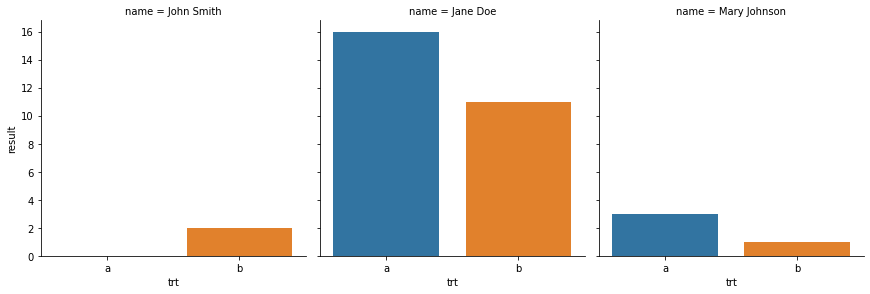

In [77]:
# Look at some of the awesome out-of-the-box seaborn functionality:

import seaborn as sns

sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy1, height=4);

### Let's Try It Out

Now with Instacart Data. We're going to try and reproduce a small part of this visualization: 

In [30]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

In [16]:

%cd instacart-market-basket-analysis/
%ls -l

[Errno 2] No such file or directory: 'instacart-market-basket-analysis/'
/content/instacart-market-basket-analysis
total 897416
-rw-r--r-- 1 root root      2603 May  2  2017 aisles.csv
-rw-rw-r-- 1 root root      1911 Dec 11  2019 aisles.csv.zip
-rw-r--r-- 1 root root       270 May  2  2017 departments.csv
-rw-rw-r-- 1 root root       804 Dec 11  2019 departments.csv.zip
drwxrwxr-x 2 root root      4096 Oct  5 17:05 __MACOSX/
-rw-r--r-- 1 root root 577550706 May  2  2017 order_products__prior.csv
-rw-rw-r-- 1 root root 164687340 Dec 11  2019 order_products__prior.csv.zip
-rw-r--r-- 1 root root  24680147 May  2  2017 order_products__train.csv
-rw-rw-r-- 1 root root   7238754 Dec 11  2019 order_products__train.csv.zip
-rw-r--r-- 1 root root 108968645 May  2  2017 orders.csv
-rw-rw-r-- 1 root root  32807090 Dec 11  2019 orders.csv.zip
-rw-r--r-- 1 root root   2166953 May  2  2017 products.csv
-rw-rw-r-- 1 root root    813666 Dec 11  2019 products.csv.zip


In [25]:
import pandas as pd
# need to do one at a time, or craches

products=pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'),  pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

#### Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

Here's the two products that we want to work with.

In [19]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

Lets remind ourselves of what columns we have to work with:

In [26]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [21]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [27]:
list(orders.columns)

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [29]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [28]:
display(example)

NameError: ignored

This might blow your mind, but we're going to subset the dataframes to select specific columns **and** merge them all in one go. Ready?

In [31]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))


print(merged.shape)
merged.head()

(33819106, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


Ok, so we were a little bit lazy and probably should have subsetted our the rows of our dataframes before we merged them. We are going to filter after the fact. This is something that you can try out for practice. Can you figure out how to filter these dataframes **before** merging rather than after?

In [32]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names) 

subset = merged[condition]

print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


Again, there are multiple effective ways to write conditions. 

In [33]:
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | 
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

subset = merged[condition]

print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [34]:
subset['product_name'].value_counts()

Half And Half Ultra Pasteurized    2995
Half Baked Frozen Yogurt           2983
Name: product_name, dtype: int64

#### 4 ways to reshape and plot



In [35]:
display(example)

1) The `.value_counts()` approach.

Remember, that we're trying to get the key variables (values) listed as a single column.

In [36]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [34]:
froyo.head()

,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [37]:
cream.head()

,product_id,product_name,order_id,order_hour_of_day
45167,9292,Half And Half Ultra Pasteurized,802884,8
74055,9292,Half And Half Ultra Pasteurized,3230936,14
163486,9292,Half And Half Ultra Pasteurized,1599440,11
191375,9292,Half And Half Ultra Pasteurized,212295,8
200888,9292,Half And Half Ultra Pasteurized,507671,14


In [38]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

In [39]:
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.005364
1     0.002682
2     0.002682
3     0.001006
4     0.000670
5     0.003352
6     0.006034
7     0.019779
8     0.029836
9     0.042910
10    0.059001
11    0.067717
12    0.065035
13    0.078780
14    0.084479
15    0.095206
16    0.092189
17    0.084814
18    0.085484
19    0.066376
20    0.049279
21    0.028830
22    0.016426
23    0.012068
Name: order_hour_of_day, dtype: float64

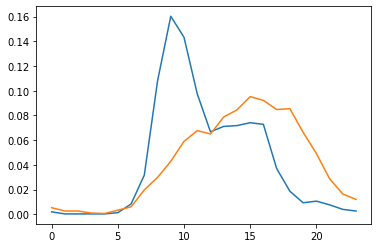

In [40]:
import matplotlib.pyplot as plt

(cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
 .plot())
(froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()
 .plot());

In [41]:
display(example)

2) Crosstab

In [43]:
wide = pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], 
            normalize='columns')

wide.head()

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.002003,0.005364
1,0.000334,0.002682
2,0.000334,0.002682
3,0.000000,0.001006
4,0.000334,0.000670


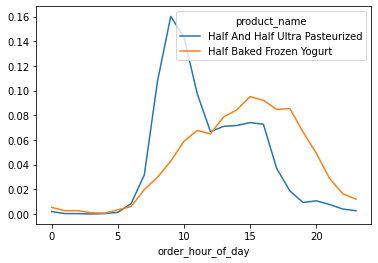

In [44]:
wide.plot();

3) Pivot Table

In [45]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len)

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,6.0,16.0
1,1.0,8.0
2,1.0,8.0
3,NaN,3.0
4,1.0,2.0
5,4.0,10.0
6,25.0,18.0
7,95.0,59.0
8,323.0,89.0


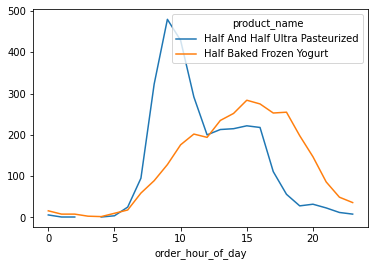

In [46]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len).plot();

4) Melt 

We've got to get it into wide format first. We'll use a crosstab which is a specific type of pivot_table.

In [47]:
melted = wide.reset_index().melt(id_vars='order_hour_of_day')

melted.head()

,order_hour_of_day,product_name,value
0,0,Half And Half Ultra Pasteurized,0.002003
1,1,Half And Half Ultra Pasteurized,0.000334
2,2,Half And Half Ultra Pasteurized,0.000334
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000334


In [48]:
melted = melted.rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 })

melted

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.002003
1,1,Half And Half Ultra Pasteurized,0.000334
2,2,Half And Half Ultra Pasteurized,0.000334
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000334
5,5,Half And Half Ultra Pasteurized,0.001336
6,6,Half And Half Ultra Pasteurized,0.008347
7,7,Half And Half Ultra Pasteurized,0.031720
8,8,Half And Half Ultra Pasteurized,0.107846
9,9,Half And Half Ultra Pasteurized,0.160267


Now, with Seaborn:

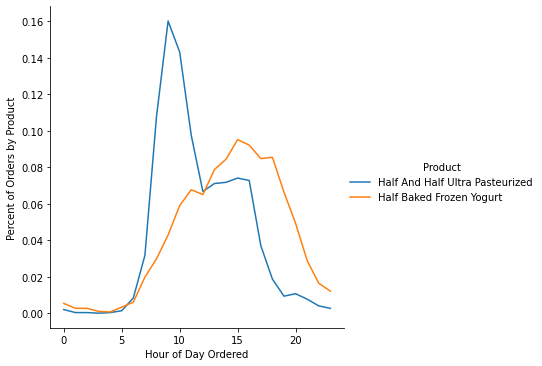

In [49]:
import seaborn as sns
sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product',
            data=melted,
            kind='line');

In [51]:
product_names

['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [50]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [52]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [53]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [69]:
order_products[['order_id']].min()

order_id    1
dtype: int64

In [55]:
order_products=order_products.sort_values(by = 'order_id')
order_products.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0


In [56]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [57]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [58]:
products[['product_id','product_name']].head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [59]:
merged=products[['product_id','product_name']].merge(order_products[['order_id','product_id']])
merged.head()


,product_id,product_name,order_id
0,1,Chocolate Sandwich Cookies,1107
1,1,Chocolate Sandwich Cookies,5319
2,1,Chocolate Sandwich Cookies,6695
3,1,Chocolate Sandwich Cookies,7540
4,1,Chocolate Sandwich Cookies,9228


In [62]:
merged2=(order_products[['order_id','product_id']]).merge(products[['product_id','product_name']]).merge(orders[['order_id','order_hour_of_day']])
merged2.head()

,order_id,product_id,product_name,order_hour_of_day
0,1,49302,Bulgarian Yogurt,10
1,1,10246,Organic Celery Hearts,10
2,1,49683,Cucumber Kirby,10
3,1,43633,Lightly Smoked Sardines in Olive Oil,10
4,1,13176,Bag of Organic Bananas,10


In [69]:
#select on items in product_name, ['Half Baked Frosezn Yogurt', 'Half And Half Ultra Pasteurized']
product_names=['Half Baked Frozen Yogurt','Half And Half Ultra Pasteurized']
condition=merged2['product_name'].isin(product_names)
condition

0           False
1           False
2           False
3           False
4           False
            ...  
33819101    False
33819102    False
33819103    False
33819104    False
33819105    False
Name: product_name, Length: 33819106, dtype: bool

In [75]:
subset=merged2[condition]
print(subset.shape)
subset.head()

(5978, 4)


,order_id,product_id,product_name,order_hour_of_day
96279,758653,30668,Half Baked Frozen Yogurt,10
124562,992027,30668,Half Baked Frozen Yogurt,15
132743,1061250,30668,Half Baked Frozen Yogurt,14
143235,1142504,30668,Half Baked Frozen Yogurt,11
147498,1180441,30668,Half Baked Frozen Yogurt,15


In [85]:
condition2=(merged2['product_name']=='Half Baked Frozen Yogurt') | (merged2['product_name']=='Half And Half Ultra Pasteurized')
subset2=merged2[condition2]
print(subset2.shape)
subset2.head()

(5978, 4)


,order_id,product_id,product_name,order_hour_of_day
96279,758653,30668,Half Baked Frozen Yogurt,10
124562,992027,30668,Half Baked Frozen Yogurt,15
132743,1061250,30668,Half Baked Frozen Yogurt,14
143235,1142504,30668,Half Baked Frozen Yogurt,11
147498,1180441,30668,Half Baked Frozen Yogurt,15


In [87]:
subset2['product_name'].value_counts()

Half And Half Ultra Pasteurized    2995
Half Baked Frozen Yogurt           2983
Name: product_name, dtype: int64

In [89]:
froyo=subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream=subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [90]:
cream.head()

,order_id,product_id,product_name,order_hour_of_day
427639,7906,9292,Half And Half Ultra Pasteurized,9
439902,32209,9292,Half And Half Ultra Pasteurized,9
456583,69363,9292,Half And Half Ultra Pasteurized,8
458788,74070,9292,Half And Half Ultra Pasteurized,14
464413,87621,9292,Half And Half Ultra Pasteurized,12


In [91]:
froyo.head()

,order_id,product_id,product_name,order_hour_of_day
96279,758653,30668,Half Baked Frozen Yogurt,10
124562,992027,30668,Half Baked Frozen Yogurt,15
132743,1061250,30668,Half Baked Frozen Yogurt,14
143235,1142504,30668,Half Baked Frozen Yogurt,11
147498,1180441,30668,Half Baked Frozen Yogurt,15


In [104]:
var1=cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
var1

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

In [105]:
var2=froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()
var2

0     0.005364
1     0.002682
2     0.002682
3     0.001006
4     0.000670
5     0.003352
6     0.006034
7     0.019779
8     0.029836
9     0.042910
10    0.059001
11    0.067717
12    0.065035
13    0.078780
14    0.084479
15    0.095206
16    0.092189
17    0.084814
18    0.085484
19    0.066376
20    0.049279
21    0.028830
22    0.016426
23    0.012068
Name: order_hour_of_day, dtype: float64

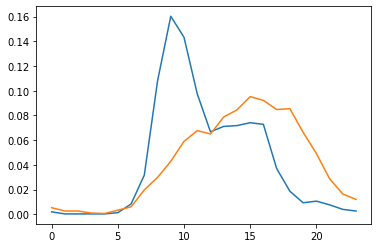

In [107]:
import matplotlib.pyplot as plt
var1.plot()
var2.plot();